In [189]:
%pip install seaborn
%pip install pyspellchecker
%pip install unidecode

In [190]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#import local.lib.timeseries as ts
%matplotlib inline

In [191]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

In [192]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

udea-ai4eng-20242.zip: Skipping, found more recently modified local copy (use --force to force download)


In [193]:
!unzip udea*.zip > /dev/null

replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [194]:
pd.set_option('display.max_columns', None)

In [195]:
df_train = pd.read_csv('train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object
dtypes: int64(2), object(10)
memory

In [196]:
df_train.describe(include='all')

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
count,692500.000000,692500.000000,692500,692500,686213,661643,660363,665871,669322,668836,686002,692500
unique,NaN,NaN,948,31,8,5,7,2,12,12,2,4
top,NaN,NaN,DERECHO,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,alto
freq,NaN,NaN,53244,282159,204048,249352,232671,592514,128289,141744,382201,175619
mean,494606.130576,20198.366679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,285585.209455,10.535037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,20183.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,247324.750000,20195.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,494564.500000,20195.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,741782.500000,20203.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
df_train.select_dtypes(include=['object']).columns

Index(['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')

# Análisis de las columnas categóricas
Se determina la distribución de las columnas, teniendo en cuenta la cantidad de personas por cada una. Los datos en programa académico y departamento son los más problemáticos ya que contienen la mayor cantidad de valores únicos

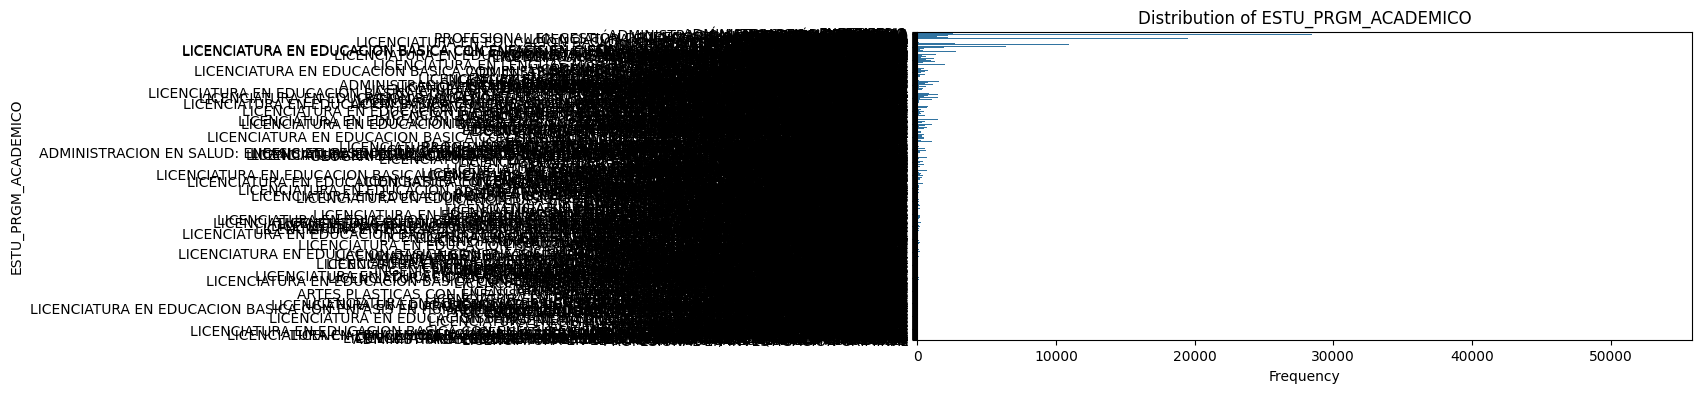

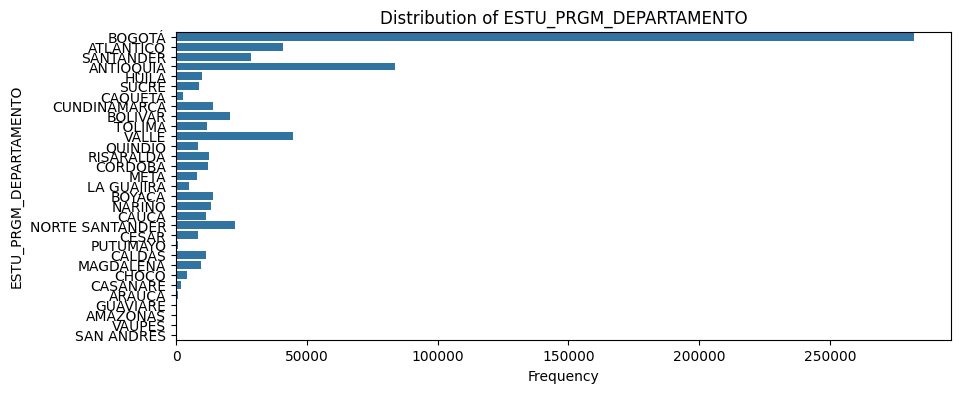

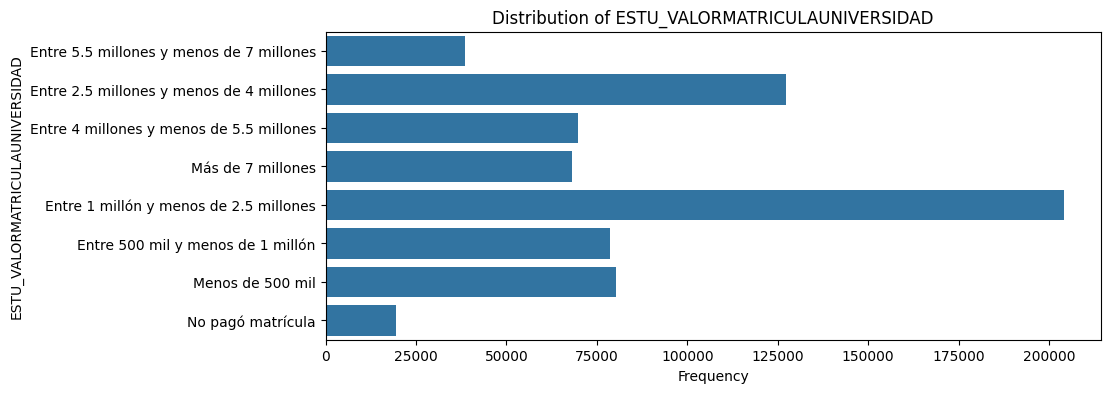

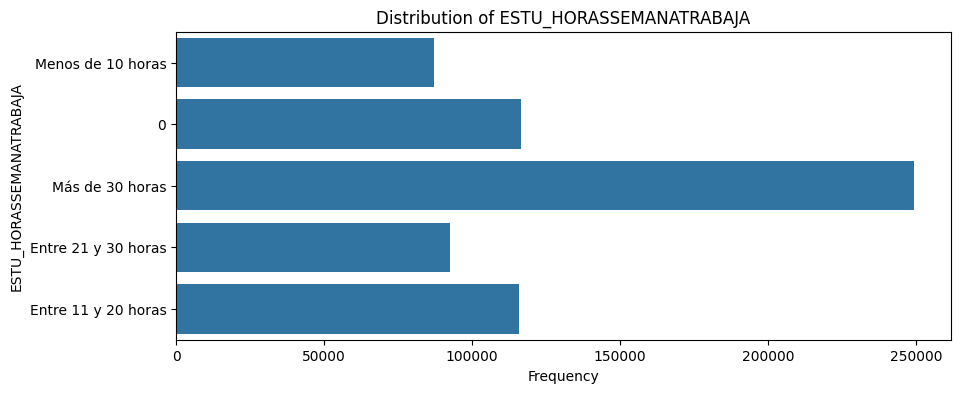

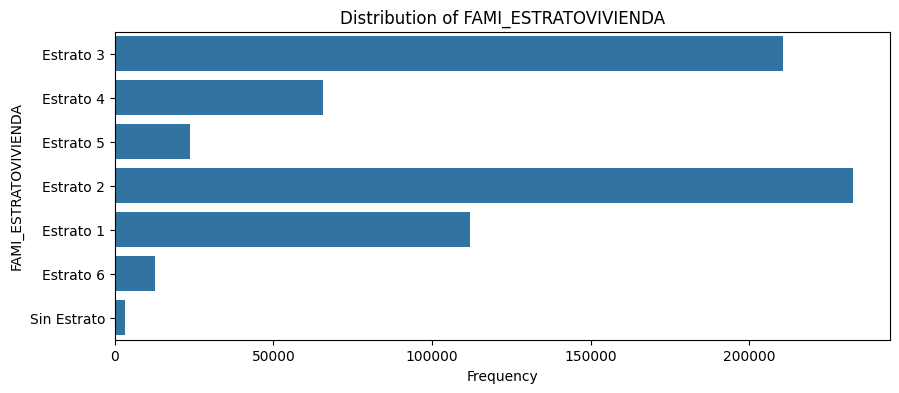

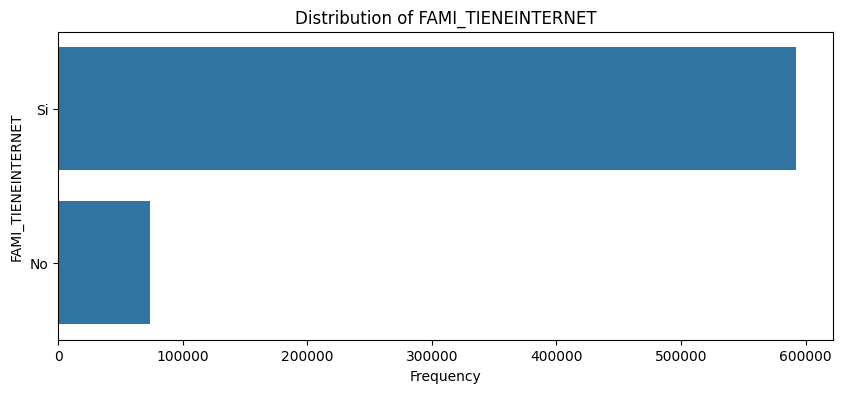

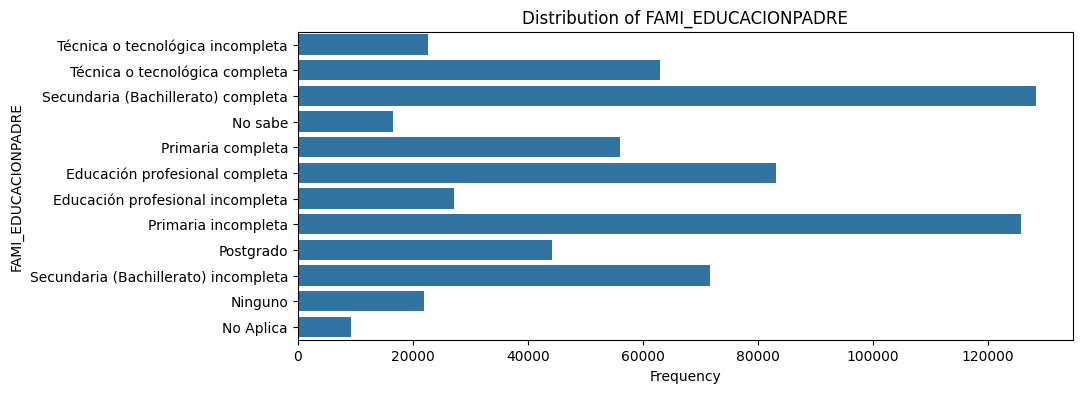

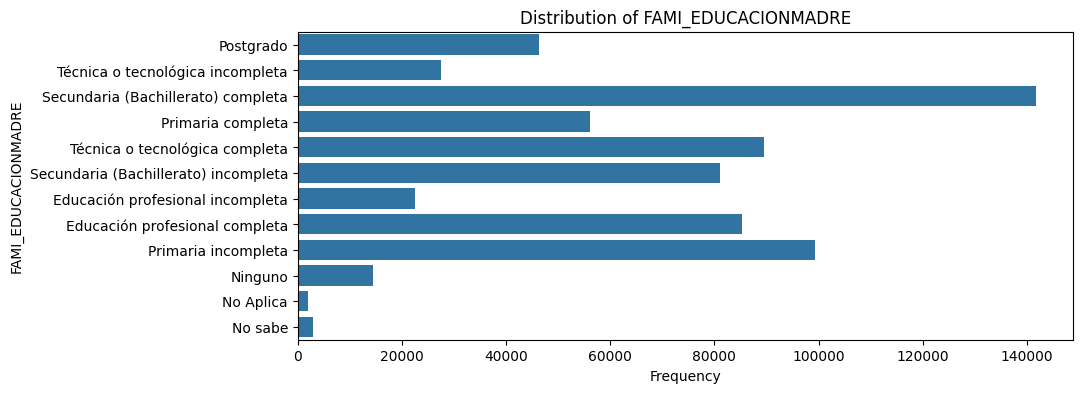

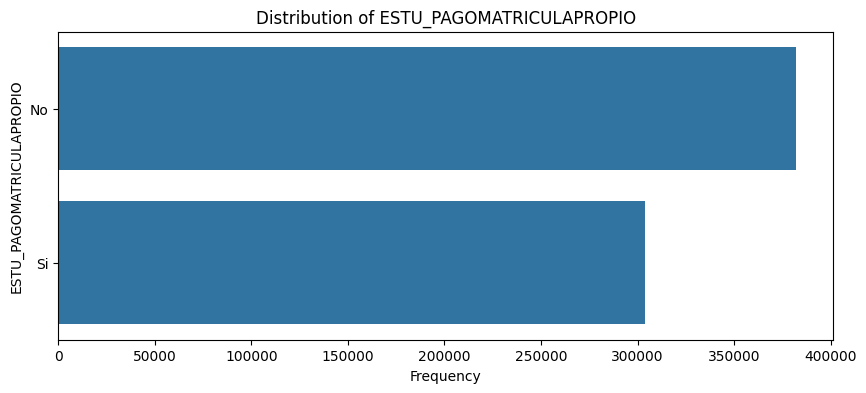

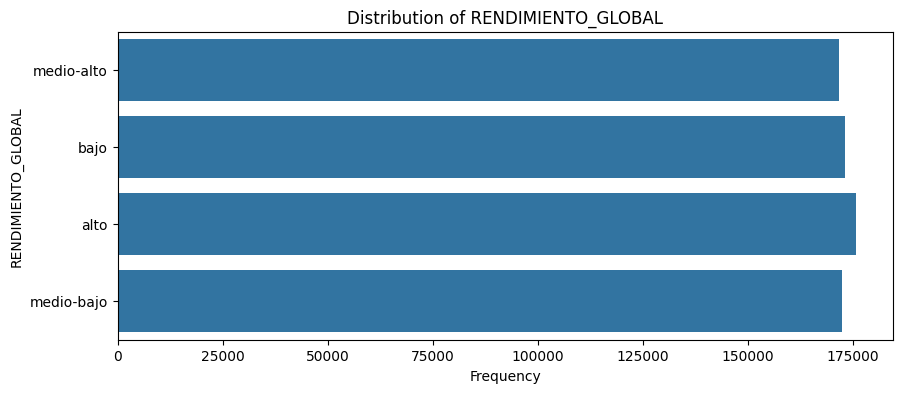

In [198]:
import seaborn as sns
# Distribución de columnas categóricas
categorical_columns = df_train.select_dtypes(include=['object']).columns
categorical_features = ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL']

for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df_train[col].dropna())
    plt.title(f'Distribution of {col}')
    plt.xlabel('Frequency')
    plt.ylabel(col)
    plt.show()

Se cuentan los valores únicos de cada columna

In [199]:
# Valores únicos en columnas categóricas
for col in categorical_features:
    unique_values = df_train[col].unique()
    print(f'{col} has {len(unique_values)} unique values: {unique_values}')

ESTU_PRGM_ACADEMICO has 948 unique values: ['ENFERMERIA' 'DERECHO' 'MERCADEO Y PUBLICIDAD'
 'ADMINISTRACION DE EMPRESAS' 'PSICOLOGIA' 'MEDICINA VETERINARIA'
 'INGENIERIA MECANICA' 'ADMINISTRACIÓN EN SALUD OCUPACIONAL'
 'INGENIERIA INDUSTRIAL' 'ADMINISTRACIÓN FINANCIERA' 'HOTELERIA Y TURISMO'
 'LICENCIATURA EN CIENCIAS SOCIALES' 'LICENCIATURA EN PEDAGOGIA INFANTIL'
 'COMUNICACION SOCIAL' 'CIENCIA POLITICA'
 'PROFESIONAL EN GESTIÓN DE LA SEGURIDAD Y LA SALUD LABORAL'
 'MAESTRO EN MÚSICA' 'INGENIERIA MECATRONICA' 'TRABAJO SOCIAL'
 'LICENCIATURA EN BIOLOGIA Y EDUCACION AMBIENTAL' 'INGENIERIA CIVIL'
 'CONTADURIA PÚBLICA' 'ADMINISTRACION EN SALUD'
 'ADMINISTRACIÓN DE EMPRESAS' 'ESTADISTICA' 'LICENCIATURA EN BIOLOGIA'
 'INGENIERIA AGROINDUSTRIAL' 'ZOOTECNIA' 'COMUNICACION AUDIOVISUAL'
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES-INGLES'
 'COMUNICACION SOCIAL  - PERIODISMO' 'SEGURIDAD Y SALUD EN EL TRABAJO'
 'MEDICINA' 'ADMINISTRACION DE LA SEGURIDAD SOCIAL' 'CONTADURIA PUBLIC

# Valores nulos
Un conteo de los valores nulos permite conocer la cantidad de datos faltantes por columna en el dataset

In [200]:
missing_values = df_train.isnull().sum()
print(missing_values)

ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_EDUCACIONMADRE               23664
ESTU_PAGOMATRICULAPROPIO           6498
RENDIMIENTO_GLOBAL                    0
dtype: int64


# Imputar los valores más frecuentes en los espacios vacíos
Sabiendo la cantidad de datos faltantes, se toma la decisión de rellenar dichos campos con la moda de cada columna, lo cual permite tener un dataset completo con la totalidad de los datos

In [201]:
from sklearn.impute import SimpleImputer

# Definir las columnas categóricas y numéricas
categorical_features = ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL']
# Imputar valores faltantes en columnas categóricas con la moda
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_train[categorical_features] = categorical_imputer.fit_transform(df_train[categorical_features])

missing_values = df_train.isnull().sum()
print(missing_values)


ID                                0
PERIODO                           0
ESTU_PRGM_ACADEMICO               0
ESTU_PRGM_DEPARTAMENTO            0
ESTU_VALORMATRICULAUNIVERSIDAD    0
ESTU_HORASSEMANATRABAJA           0
FAMI_ESTRATOVIVIENDA              0
FAMI_TIENEINTERNET                0
FAMI_EDUCACIONPADRE               0
FAMI_EDUCACIONMADRE               0
ESTU_PAGOMATRICULAPROPIO          0
RENDIMIENTO_GLOBAL                0
dtype: int64


# Estandarizacion de columna ESTU_PRGM_ACADEMICO
Igual que en la entrega anterior, se decide estandarizar la columna de datos del programa académico de cada evaluado, la idea es entonces eliminar los caracteres especiales para luego aplicar una especie de filtro que los agrupará en una menor cantidad de valores únicos.

In [202]:

# Limpiar la columna 'ESTU_PRGM_ACADEMICO'
from spellchecker import SpellChecker
from unidecode import unidecode

# Limpiar la columna 'ESTU_PRGM_ACADEMICO'
df_train['ESTU_PRGM_ACADEMICO'] = df_train['ESTU_PRGM_ACADEMICO'].str.strip()
df_train['ESTU_PRGM_ACADEMICO'] = df_train['ESTU_PRGM_ACADEMICO'].str.replace(',', '')
df_train['ESTU_PRGM_ACADEMICO'] = df_train['ESTU_PRGM_ACADEMICO'].str.replace('-', '')
df_train['ESTU_PRGM_ACADEMICO'] = df_train['ESTU_PRGM_ACADEMICO'].str.replace('.', '')
df_train['ESTU_PRGM_ACADEMICO'] = df_train['ESTU_PRGM_ACADEMICO'].str.lower()
df_train['ESTU_PRGM_ACADEMICO'] = df_train['ESTU_PRGM_ACADEMICO'].str.normalize('NFKD')
df_train['ESTU_PRGM_ACADEMICO'] = df_train['ESTU_PRGM_ACADEMICO'].str.replace('[áéíóúÁÉÍÓÚ]', 'aeiouAEIOU')
df_train['ESTU_PRGM_ACADEMICO'] = df_train['ESTU_PRGM_ACADEMICO'].apply(unidecode)

def column_cleaning(df, column):
    df[column] = df[column].str.strip()
    df[column] = df[column].str.replace(',', '')
    df[column] = df[column].str.replace('-', '')
    df[column] = df[column].str.replace('.', '')
    df[column] = df[column].str.lower()
    df[column] = df[column].str.normalize('NFKD')
    df[column] = df[column].str.replace('[áéíóúÁÉÍÓÚ]', 'aeiouAEIOU')
    df[column] = df[column].apply(unidecode)
    return df

spell = SpellChecker(language=None)  # Establecer el idioma en español

def correct_spelling(text):
    # Separar el texto en palabras
    words = text.split()
    # Corregir ortografía para cada palabra
    corrected_words = []
    for word in words:
        corrected_word = spell.correction(word)
        # Verificar si la palabra corregida es no nula y no contiene caracteres especiales
        if corrected_word is not None and not any(char in corrected_word for char in ['?', '¿', '¡', '!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '_', '-', '+', '=', '{', '}', '[', ']', '|', '\\', '/', ':', ';', '"', "'", '<', '>', ',', '.']):
            corrected_words.append(corrected_word)
    # Unir las palabras corregidas nuevamente en un solo texto
    corrected_text = ' '.join(corrected_words)
    return corrected_text


# Aplicar la corrección ortográfica a toda la columna
df_train['ESTU_PRGM_ACADEMICO'] = df_train['ESTU_PRGM_ACADEMICO'].apply(correct_spelling)

# Eliminar valores duplicados
unique_values = df_train['ESTU_PRGM_ACADEMICO'].unique()
print(len(unique_values))
#print(unique_values)

714


Una vez estandarizados los datos se comprueba que disminuye la cantidad de valores únicos en la columna. También se comprueba que no se tengan valores nulos como se planeó en uno de los pasos anteriores

In [203]:
missing_values = df_train.isnull().sum()
print(missing_values)

ID                                0
PERIODO                           0
ESTU_PRGM_ACADEMICO               0
ESTU_PRGM_DEPARTAMENTO            0
ESTU_VALORMATRICULAUNIVERSIDAD    0
ESTU_HORASSEMANATRABAJA           0
FAMI_ESTRATOVIVIENDA              0
FAMI_TIENEINTERNET                0
FAMI_EDUCACIONPADRE               0
FAMI_EDUCACIONMADRE               0
ESTU_PAGOMATRICULAPROPIO          0
RENDIMIENTO_GLOBAL                0
dtype: int64


Posteriormente se aplica el filtro, el ideal es tener menor cantidad de valores únicos por lo que se agrupan en grandes áreas cada una de las carreras presentes en la columna de datos.
Al final es posible ver que solo quedan 11 datos únicos, donde la mayor cantidad quedaría filtrada en 'otro' debido a todos los datos diferentes que se tenían inicialmente

In [204]:
import re

# Definir la función para categorizar las carreras
def categorize_career(career_name):
    career_lower = career_name.lower()
    if re.search(r'ingenieria', career_lower):
        return 'Ingeniería'
    elif re.search(r'administracion|mercadeo|negocios|banca|finanzas', career_lower):
        return 'Administración y Negocios'
    elif re.search(r'ciencias exactas|matematicas|estadistica|fisica|quimica|geologia', career_lower):
        return 'Ciencias Exactas'
    elif re.search(r'medicina|enfermeria|veterinaria|odontologia|terapia ocupacional|bacteriologia|fonoaudiologia|terapia respiratoria|microbiologia', career_lower):
        return 'Ciencias de la Salud'
    elif re.search(r'comunicacion social|periodismo|comunicacion grafica|comunicacion digital|arqueologia|comunicacion entretenimiento digital|comunicacion periodismo', career_lower):
        return 'Comunicación y Periodismo'
    elif re.search(r'derecho|criminalistica|arquitectura', career_lower):
        return 'Derecho y Arquitectura'
    elif re.search(r'licenciatura|educacion|pedagogia|lenguas|artes|musica|filosofia|danza|teologia|letras|bibliotecologia|antropologia|geografia|diseno', career_lower):
        return 'Licenciaturas y Educación'
    elif re.search(r'software|informatica|telematica', career_lower):
        return 'Tecnología de la Información'
    elif re.search(r'diseno|artes visuales|diseno digital', career_lower):
        return 'Diseño y Artes Visuales'
    elif re.search(r'deporte|actividad fisica|cultura fisica', career_lower):
        return 'Deporte y Actividad Física'
    elif re.search(r'gastro|gastronomia|cocina', career_lower):
        return 'Gastronomía'
    else:
        return 'Otro'

# Aplicar la función categorize_career a la columna ESTU_PRGM_ACADEMICO y crear la columna Sector_Estudio
df_train['ESTU_PRGM_ACADEMICO'] = df_train['ESTU_PRGM_ACADEMICO'].apply(categorize_career)

unique_values = df_train['ESTU_PRGM_ACADEMICO'].unique()
print(unique_values)
#print(unique_values)
df_train['ESTU_PRGM_ACADEMICO']

['Ciencias de la Salud' 'Derecho y Arquitectura'
 'Administración y Negocios' 'Otro' 'Ingeniería'
 'Licenciaturas y Educación' 'Comunicación y Periodismo'
 'Ciencias Exactas' 'Deporte y Actividad Física'
 'Tecnología de la Información' 'Gastronomía']


,ESTU_PRGM_ACADEMICO
0,Ciencias de la Salud
1,Derecho y Arquitectura
2,Administración y Negocios
3,Administración y Negocios
4,Otro
...,...
692495,Otro
692496,Otro
692497,Administración y Negocios
692498,Otro


# Conversión de columnas escalables a números
Aquí se planea escalar las columnas que lo permiten, en este caso de manera ordinal de menor a mayor los valores que representan una mayor posición. En el caso del rendimiento, 0 es lo más bajo y 3 lo más alto, se aplica consecutivamente para diferentes columnas como horas de trabajo, valor matrícula, estrato y grado de educación.

También se remplazan los SÍ y NO por 1 y 2, a igual que los S y N.

In [205]:
#Se cambian datos str a float para hacer correlacion y ver mejor (se le asigna un valor)
mapeo = {
    'RENDIMIENTO_GLOBAL': {'medio-alto': 2, 'bajo': 0, 'alto': 3, 'medio-bajo': 1},
    'ESTU_HORASSEMANATRABAJA': {'Menos de 10 horas': 1,
                                 '0': 0,
                                 'Más de 30 horas': 4,
                                 'Entre 21 y 30 horas': 3,
                                 'Entre 11 y 20 horas': 2},
    'ESTU_VALORMATRICULAUNIVERSIDAD': {'Entre 5.5 millones y menos de 7 millones': 6,
                                       'Entre 2.5 millones y menos de 4 millones': 4,
                                       'Entre 4 millones y menos de 5.5 millones': 5,
                                       'Más de 7 millones': 7,
                                       'Entre 1 millón y menos de 2.5 millones': 3,
                                       'Entre 500 mil y menos de 1 millón': 2,
                                       'Menos de 500 mil': 1,
                                       'No pagó matrícula': 0},
    'FAMI_ESTRATOVIVIENDA': {'Estrato 3':3,
                             'Estrato 4':4,
                             'Estrato 5':5,
                             'Estrato 2':2,
                             'Estrato 1':1,
                             'Estrato 6':6,
                             'Sin Estrato':0},
    'FAMI_EDUCACIONPADRE':{'No Aplica':0,
                           'Ninguno':1,
                           'No sabe':2,
                           'Primaria incompleta':3,
                           'Primaria completa':4,
                           'Secundaria (Bachillerato) incompleta':5,
                           'Secundaria (Bachillerato) completa':6,
                           'Técnica o tecnológica incompleta':7,
                           'Técnica o tecnológica completa':8,
                           'Educación profesional incompleta':9,
                           'Educación profesional completa':10,
                           'Postgrado':11},
    'FAMI_EDUCACIONMADRE':{'No Aplica':0,
                           'Ninguno':1,
                           'No sabe':2,
                           'Primaria incompleta':3,
                           'Primaria completa':4,
                           'Secundaria (Bachillerato) incompleta':5,
                           'Secundaria (Bachillerato) completa':6,
                           'Técnica o tecnológica incompleta':7,
                           'Técnica o tecnológica completa':8,
                           'Educación profesional incompleta':9,
                           'Educación profesional completa':10,
                           'Postgrado':11},
}

# Aplicar los mapeos al DataFrame original
df_train.replace(mapeo, inplace=True)

# Se reemplazan los Sí/S y No/N por 1 y 2, respectivamente
df_train.replace({'Si': 1, 'No': 2}, inplace=True)
df_train.replace({'S': 1, 'N': 2}, inplace=True)

df_train

<ipython-input-205-a2312be5e217>:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train.replace(mapeo, inplace=True)
<ipython-input-205-a2312be5e217>:54: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train.replace({'Si': 1, 'No': 2}, inplace=True)


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,Ciencias de la Salud,BOGOTÁ,6,1,3,1,7,11,2,2
1,645256,20212,Derecho y Arquitectura,ATLANTICO,4,0,3,2,8,7,2,0
2,308367,20203,Administración y Negocios,BOGOTÁ,4,4,3,1,6,6,2,0
3,470353,20195,Administración y Negocios,SANTANDER,5,0,4,1,2,6,2,3
4,989032,20212,Otro,ANTIOQUIA,4,3,3,1,4,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,Otro,LA GUAJIRA,2,2,2,1,6,5,1,2
692496,754213,20212,Otro,NORTE SANTANDER,4,4,3,1,3,5,2,0
692497,504185,20183,Administración y Negocios,BOGOTÁ,3,1,3,1,6,5,1,1
692498,986620,20195,Otro,TOLIMA,4,1,1,2,4,4,1,0


In [206]:
categorical_features = ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO']

for col in categorical_features:
    unique_values = df_train[col].unique()
    print(f'{col} has {len(unique_values)} unique values: {unique_values}')

ESTU_PRGM_ACADEMICO has 11 unique values: ['Ciencias de la Salud' 'Derecho y Arquitectura'
 'Administración y Negocios' 'Otro' 'Ingeniería'
 'Licenciaturas y Educación' 'Comunicación y Periodismo'
 'Ciencias Exactas' 'Deporte y Actividad Física'
 'Tecnología de la Información' 'Gastronomía']
ESTU_PRGM_DEPARTAMENTO has 31 unique values: ['BOGOTÁ' 'ATLANTICO' 'SANTANDER' 'ANTIOQUIA' 'HUILA' 'SUCRE' 'CAQUETA'
 'CUNDINAMARCA' 'BOLIVAR' 'TOLIMA' 'VALLE' 'QUINDIO' 'RISARALDA' 'CORDOBA'
 'META' 'LA GUAJIRA' 'BOYACA' 'NARIÑO' 'CAUCA' 'NORTE SANTANDER' 'CESAR'
 'PUTUMAYO' 'CALDAS' 'MAGDALENA' 'CHOCO' 'CASANARE' 'ARAUCA' 'GUAVIARE'
 'AMAZONAS' 'VAUPES' 'SAN ANDRES']
ESTU_VALORMATRICULAUNIVERSIDAD has 8 unique values: [6 4 5 7 3 2 1 0]
ESTU_HORASSEMANATRABAJA has 5 unique values: [1 0 4 3 2]
FAMI_ESTRATOVIVIENDA has 7 unique values: [3 4 5 2 1 6 0]
FAMI_TIENEINTERNET has 2 unique values: [1 2]
FAMI_EDUCACIONPADRE has 12 unique values: [ 7  8  6  2  4 10  9  3 11  5  1  0]
FAMI_EDUCACIONMADRE has 

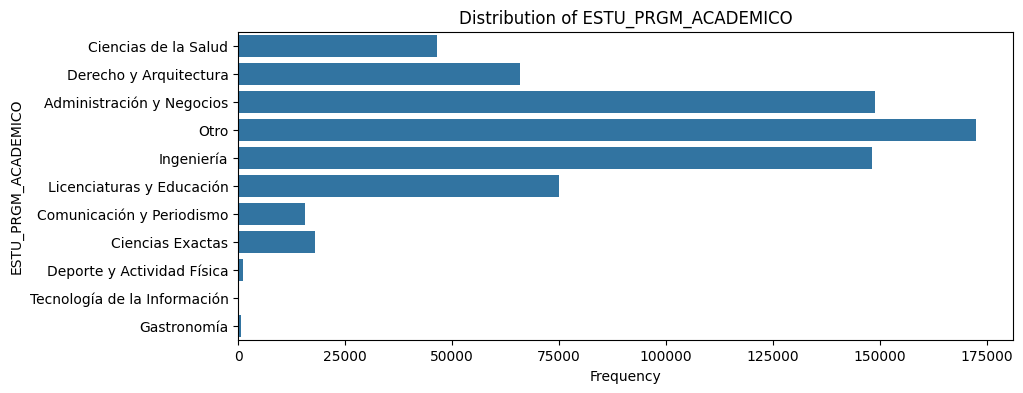

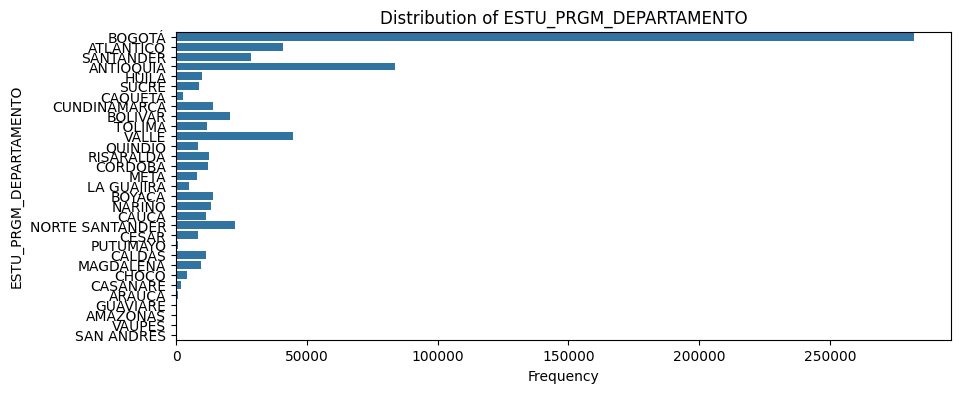

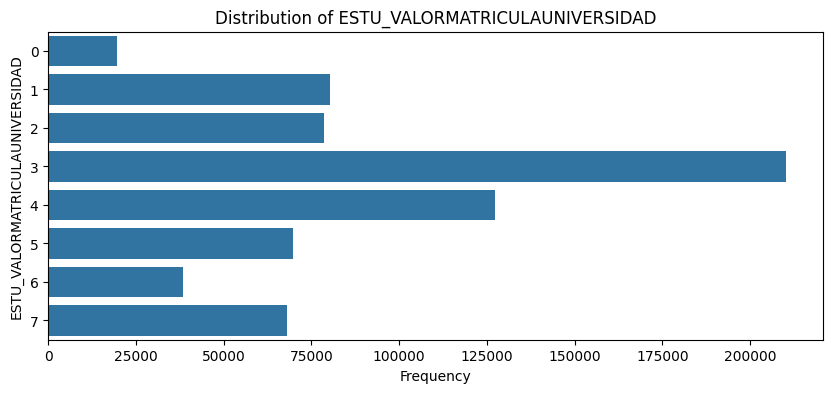

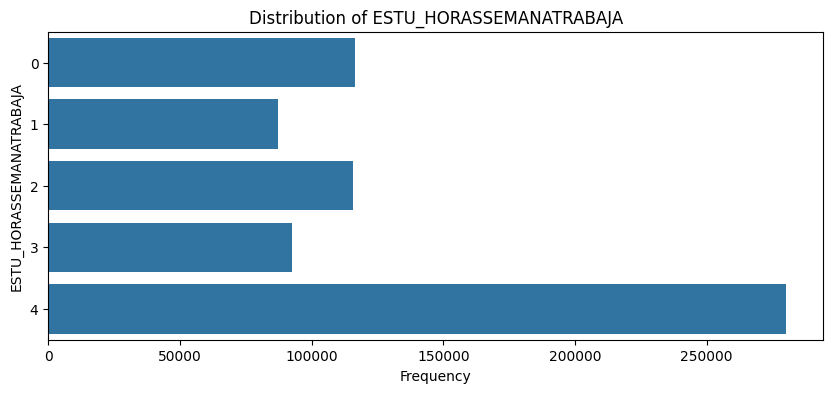

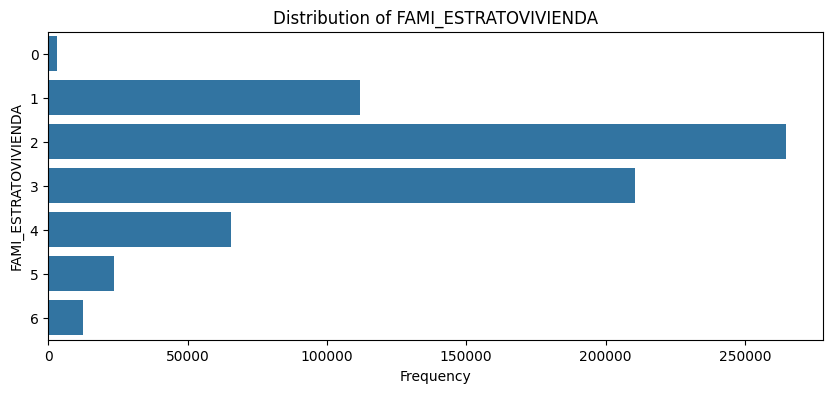

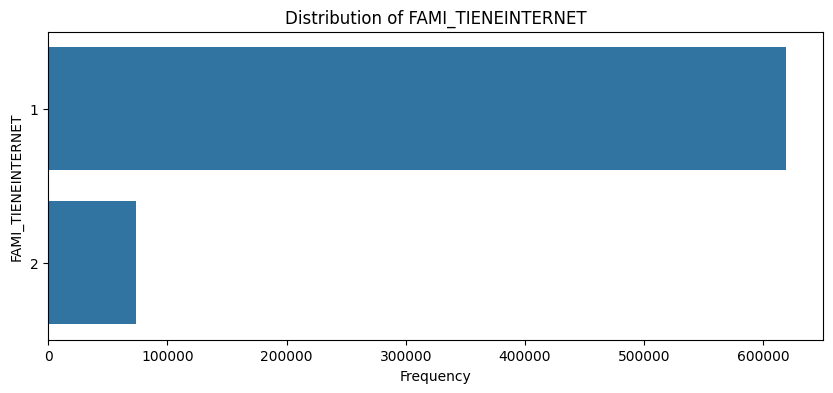

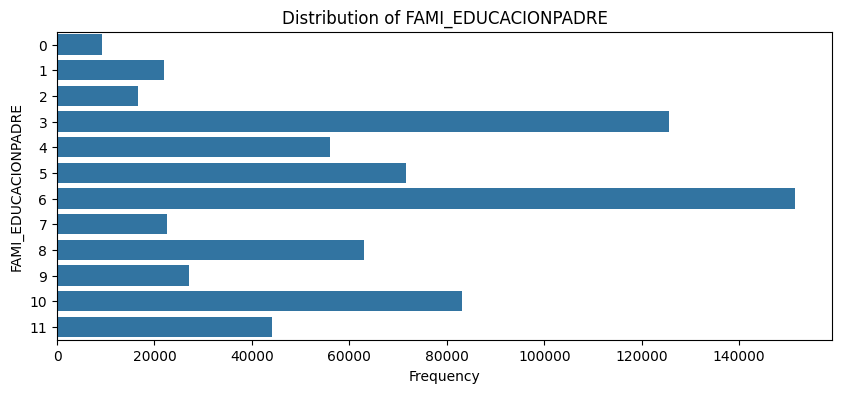

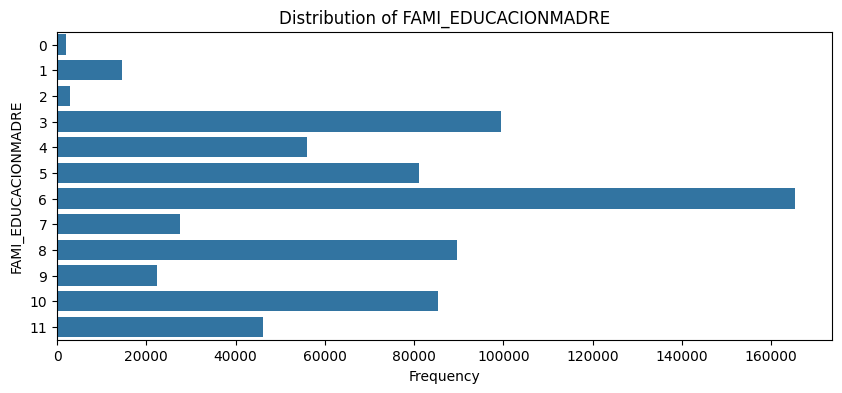

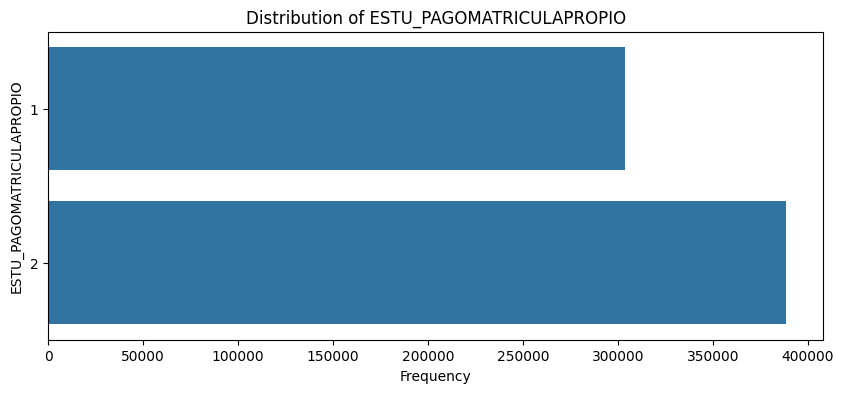

In [207]:
categorical_features =['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO']

for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df_train[col].dropna())
    plt.title(f'Distribution of {col}')
    plt.xlabel('Frequency')
    plt.ylabel(col)
    plt.show()

In [208]:
df_train.describe(include='all')

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
count,692500.000000,692500.000000,692500,692500,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000
unique,NaN,NaN,11,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Otro,BOGOTÁ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,172537,282159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,494606.130576,20198.366679,NaN,NaN,3.514966,2.480606,2.497311,1.105931,5.986614,6.374077,1.561298,1.505227
std,285585.209455,10.535037,NaN,NaN,1.795653,1.523329,1.101868,0.307749,2.825042,2.602994,0.496229,1.121061
min,1.000000,20183.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,247324.750000,20195.000000,NaN,NaN,2.000000,1.000000,2.000000,1.000000,3.000000,4.000000,1.000000,1.000000
50%,494564.500000,20195.000000,NaN,NaN,3.000000,3.000000,2.000000,1.000000,6.000000,6.000000,2.000000,2.000000
75%,741782.500000,20203.000000,NaN,NaN,5.000000,4.000000,3.000000,1.000000,8.000000,8.000000,2.000000,3.000000


Luego de analizar la nueva distribución de los datos, se dropean la columna de PERIODO e ID,  no aportan información relevante ya que el periodo tiene una distribución muy desigual y el ID siempre es único.

In [209]:
drop_cols = ['PERIODO','ID']
for i in drop_cols:
  df_train.drop(i,
  axis='columns', inplace=True)

In [210]:
df_train.head()

,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,Ciencias de la Salud,BOGOTÁ,6,1,3,1,7,11,2,2
1,Derecho y Arquitectura,ATLANTICO,4,0,3,2,8,7,2,0
2,Administración y Negocios,BOGOTÁ,4,4,3,1,6,6,2,0
3,Administración y Negocios,SANTANDER,5,0,4,1,2,6,2,3
4,Otro,ANTIOQUIA,4,3,3,1,4,4,2,1


Se hace OneHotEncoding para las columnas ESTU_PRGM_ACADEMICO y ESTU_PRGM_DEPARTAMENTO

In [211]:
df_encoded = pd.get_dummies(df_train, columns = [
    'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO'], dtype=int)

df_encoded.head()

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,ESTU_PRGM_ACADEMICO_Administración y Negocios,ESTU_PRGM_ACADEMICO_Ciencias Exactas,ESTU_PRGM_ACADEMICO_Ciencias de la Salud,ESTU_PRGM_ACADEMICO_Comunicación y Periodismo,ESTU_PRGM_ACADEMICO_Deporte y Actividad Física,ESTU_PRGM_ACADEMICO_Derecho y Arquitectura,ESTU_PRGM_ACADEMICO_Gastronomía,ESTU_PRGM_ACADEMICO_Ingeniería,ESTU_PRGM_ACADEMICO_Licenciaturas y Educación,ESTU_PRGM_ACADEMICO_Otro,ESTU_PRGM_ACADEMICO_Tecnología de la Información,ESTU_PRGM_DEPARTAMENTO_AMAZONAS,ESTU_PRGM_DEPARTAMENTO_ANTIOQUIA,ESTU_PRGM_DEPARTAMENTO_ARAUCA,ESTU_PRGM_DEPARTAMENTO_ATLANTICO,ESTU_PRGM_DEPARTAMENTO_BOGOTÁ,ESTU_PRGM_DEPARTAMENTO_BOLIVAR,ESTU_PRGM_DEPARTAMENTO_BOYACA,ESTU_PRGM_DEPARTAMENTO_CALDAS,ESTU_PRGM_DEPARTAMENTO_CAQUETA,ESTU_PRGM_DEPARTAMENTO_CASANARE,ESTU_PRGM_DEPARTAMENTO_CAUCA,ESTU_PRGM_DEPARTAMENTO_CESAR,ESTU_PRGM_DEPARTAMENTO_CHOCO,ESTU_PRGM_DEPARTAMENTO_CORDOBA,ESTU_PRGM_DEPARTAMENTO_CUNDINAMARCA,ESTU_PRGM_DEPARTAMENTO_GUAVIARE,ESTU_PRGM_DEPARTAMENTO_HUILA,ESTU_PRGM_DEPARTAMENTO_LA GUAJIRA,ESTU_PRGM_DEPARTAMENTO_MAGDALENA,ESTU_PRGM_DEPARTAMENTO_META,ESTU_PRGM_DEPARTAMENTO_NARIÑO,ESTU_PRGM_DEPARTAMENTO_NORTE SANTANDER,ESTU_PRGM_DEPARTAMENTO_PUTUMAYO,ESTU_PRGM_DEPARTAMENTO_QUINDIO,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SAN ANDRES,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_VAUPES
0,6,1,3,1,7,11,2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,0,3,2,8,7,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,4,3,1,6,6,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,4,1,2,6,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,3,3,1,4,4,2,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [212]:
df_encoded.columns

Index(['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO', 'RENDIMIENTO_GLOBAL',
       'ESTU_PRGM_ACADEMICO_Administración y Negocios',
       'ESTU_PRGM_ACADEMICO_Ciencias Exactas',
       'ESTU_PRGM_ACADEMICO_Ciencias de la Salud',
       'ESTU_PRGM_ACADEMICO_Comunicación y Periodismo',
       'ESTU_PRGM_ACADEMICO_Deporte y Actividad Física',
       'ESTU_PRGM_ACADEMICO_Derecho y Arquitectura',
       'ESTU_PRGM_ACADEMICO_Gastronomía', 'ESTU_PRGM_ACADEMICO_Ingeniería',
       'ESTU_PRGM_ACADEMICO_Licenciaturas y Educación',
       'ESTU_PRGM_ACADEMICO_Otro',
       'ESTU_PRGM_ACADEMICO_Tecnología de la Información',
       'ESTU_PRGM_DEPARTAMENTO_AMAZONAS', 'ESTU_PRGM_DEPARTAMENTO_ANTIOQUIA',
       'ESTU_PRGM_DEPARTAMENTO_ARAUCA', 'ESTU_PRGM_DEPARTAMENTO_ATLANTICO',
       'ESTU_PRGM_DEPARTAMENTO_BOGOTÁ', 'ESTU_PRGM_DEPARTAMENTO_BOLIVAR',
  

In [213]:
df_encoded.to_csv('df_filtrado.csv')

# Escalado de datos
Primero se almacenan los datos de rendimiento para extraerlos del dataset antes de hacer el escalado y se aplica un StandardScaler al resto de los datos para poder hacer el ajuste y transformación de estos para la orientación del modelo

In [214]:
df_rendimiento = df_encoded['RENDIMIENTO_GLOBAL'].to_list()
df_encoded.drop('RENDIMIENTO_GLOBAL',
  axis='columns', inplace=True)
df_rendimiento

[2,
 0,
 0,
 3,
 1,
 2,
 3,
 1,
 1,
 3,
 0,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 3,
 0,
 3,
 1,
 0,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 3,
 3,
 0,
 2,
 3,
 1,
 0,
 2,
 2,
 1,
 2,
 2,
 3,
 0,
 0,
 0,
 0,
 0,
 3,
 2,
 2,
 1,
 1,
 1,
 0,
 3,
 3,
 2,
 1,
 2,
 2,
 3,
 2,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 3,
 2,
 0,
 3,
 0,
 1,
 3,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 1,
 3,
 0,
 3,
 1,
 3,
 2,
 2,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 3,
 1,
 1,
 1,
 2,
 3,
 2,
 0,
 1,
 3,
 2,
 0,
 2,
 0,
 3,
 3,
 2,
 1,
 0,
 3,
 1,
 2,
 0,
 3,
 3,
 3,
 0,
 1,
 0,
 0,
 1,
 3,
 0,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 2,
 1,
 2,
 2,
 3,
 1,
 3,
 1,
 1,
 3,
 1,
 3,
 1,
 2,
 3,
 3,
 2,
 0,
 3,
 0,
 2,
 2,
 0,
 0,
 2,
 3,
 1,
 1,
 2,
 3,
 3,
 2,
 3,
 1,
 3,
 1,
 3,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 3,
 3,
 0,
 0,
 3,
 1,
 2,
 2,
 1,
 0,
 2,
 3,
 1,
 1,
 2,
 3,
 0,
 3,
 2,
 1,
 0,
 3,
 2,
 0,
 1,
 3,
 0,
 3,
 3,
 1,
 3,
 1,
 0,
 3,
 0,
 2,
 3,
 3,
 0,
 0,
 3,
 1,
 3,
 1,
 1,
 2,


In [215]:
scaleStandar = preprocessing.StandardScaler()
scaled = scaleStandar.fit_transform(df_encoded)
df_scaled = pd.DataFrame(scaled,columns=df_encoded.columns)

df_scaled.head(5)

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,ESTU_PRGM_ACADEMICO_Administración y Negocios,ESTU_PRGM_ACADEMICO_Ciencias Exactas,ESTU_PRGM_ACADEMICO_Ciencias de la Salud,ESTU_PRGM_ACADEMICO_Comunicación y Periodismo,ESTU_PRGM_ACADEMICO_Deporte y Actividad Física,ESTU_PRGM_ACADEMICO_Derecho y Arquitectura,ESTU_PRGM_ACADEMICO_Gastronomía,ESTU_PRGM_ACADEMICO_Ingeniería,ESTU_PRGM_ACADEMICO_Licenciaturas y Educación,ESTU_PRGM_ACADEMICO_Otro,ESTU_PRGM_ACADEMICO_Tecnología de la Información,ESTU_PRGM_DEPARTAMENTO_AMAZONAS,ESTU_PRGM_DEPARTAMENTO_ANTIOQUIA,ESTU_PRGM_DEPARTAMENTO_ARAUCA,ESTU_PRGM_DEPARTAMENTO_ATLANTICO,ESTU_PRGM_DEPARTAMENTO_BOGOTÁ,ESTU_PRGM_DEPARTAMENTO_BOLIVAR,ESTU_PRGM_DEPARTAMENTO_BOYACA,ESTU_PRGM_DEPARTAMENTO_CALDAS,ESTU_PRGM_DEPARTAMENTO_CAQUETA,ESTU_PRGM_DEPARTAMENTO_CASANARE,ESTU_PRGM_DEPARTAMENTO_CAUCA,ESTU_PRGM_DEPARTAMENTO_CESAR,ESTU_PRGM_DEPARTAMENTO_CHOCO,ESTU_PRGM_DEPARTAMENTO_CORDOBA,ESTU_PRGM_DEPARTAMENTO_CUNDINAMARCA,ESTU_PRGM_DEPARTAMENTO_GUAVIARE,ESTU_PRGM_DEPARTAMENTO_HUILA,ESTU_PRGM_DEPARTAMENTO_LA GUAJIRA,ESTU_PRGM_DEPARTAMENTO_MAGDALENA,ESTU_PRGM_DEPARTAMENTO_META,ESTU_PRGM_DEPARTAMENTO_NARIÑO,ESTU_PRGM_DEPARTAMENTO_NORTE SANTANDER,ESTU_PRGM_DEPARTAMENTO_PUTUMAYO,ESTU_PRGM_DEPARTAMENTO_QUINDIO,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SAN ANDRES,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_VAUPES
0,1.383918,-0.971956,0.456215,-0.344211,0.358716,1.777156,0.884073,-0.523142,-0.163723,3.729109,-0.151371,-0.042199,-0.324265,-0.030152,-0.521965,-0.348552,-0.576043,-0.010749,-0.0076,-0.370553,-0.029176,-0.250927,1.205939,-0.175225,-0.143896,-0.130752,-0.062085,-0.051784,-0.129783,-0.11,-0.078944,-0.133848,-0.143739,-0.00731,-0.121015,-0.083352,-0.118013,-0.107491,-0.140759,-0.183624,-0.033902,-0.109663,-0.136567,-0.0038,-0.208416,-0.112626,-0.132348,-0.262332,-0.004496
1,0.270116,-1.628413,0.456215,2.905191,0.712693,0.240463,0.884073,-0.523142,-0.163723,-0.268161,-0.151371,-0.042199,3.083897,-0.030152,-0.521965,-0.348552,-0.576043,-0.010749,-0.0076,-0.370553,-0.029176,3.985224,-0.829229,-0.175225,-0.143896,-0.130752,-0.062085,-0.051784,-0.129783,-0.11,-0.078944,-0.133848,-0.143739,-0.00731,-0.121015,-0.083352,-0.118013,-0.107491,-0.140759,-0.183624,-0.033902,-0.109663,-0.136567,-0.0038,-0.208416,-0.112626,-0.132348,-0.262332,-0.004496
2,0.270116,0.997418,0.456215,-0.344211,0.004738,-0.143710,0.884073,1.911525,-0.163723,-0.268161,-0.151371,-0.042199,-0.324265,-0.030152,-0.521965,-0.348552,-0.576043,-0.010749,-0.0076,-0.370553,-0.029176,-0.250927,1.205939,-0.175225,-0.143896,-0.130752,-0.062085,-0.051784,-0.129783,-0.11,-0.078944,-0.133848,-0.143739,-0.00731,-0.121015,-0.083352,-0.118013,-0.107491,-0.140759,-0.183624,-0.033902,-0.109663,-0.136567,-0.0038,-0.208416,-0.112626,-0.132348,-0.262332,-0.004496
3,0.827017,-1.628413,1.363766,-0.344211,-1.411171,-0.143710,0.884073,1.911525,-0.163723,-0.268161,-0.151371,-0.042199,-0.324265,-0.030152,-0.521965,-0.348552,-0.576043,-0.010749,-0.0076,-0.370553,-0.029176,-0.250927,-0.829229,-0.175225,-0.143896,-0.130752,-0.062085,-0.051784,-0.129783,-0.11,-0.078944,-0.133848,-0.143739,-0.00731,-0.121015,-0.083352,-0.118013,-0.107491,-0.140759,-0.183624,-0.033902,-0.109663,-0.136567,-0.0038,4.798102,-0.112626,-0.132348,-0.262332,-0.004496
4,0.270116,0.340960,0.456215,-0.344211,-0.703216,-0.912057,0.884073,-0.523142,-0.163723,-0.268161,-0.151371,-0.042199,-0.324265,-0.030152,-0.521965,-0.348552,1.735982,-0.010749,-0.0076,2.698666,-0.029176,-0.250927,-0.829229,-0.175225,-0.143896,-0.130752,-0.062085,-0.051784,-0.129783,-0.11,-0.078944,-0.133848,-0.143739,-0.00731,-0.121015,-0.083352,-0.118013,-0.107491,-0.140759,-0.183624,-0.033902,-0.109663,-0.136567,-0.0038,-0.208416,-0.112626,-0.132348,-0.262332,-0.004496


Este escalado muestra una distribución donde la media es 0 y los demás valores se encuentran alrededor dependiendo de la cantidad de datos únicos y los valores atípicos. El escalado tiene un comportamiento poco regular por lo que sería bueno trabajar con otros tipos de escalado.

In [216]:
df_scaled.describe().round(3)

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,ESTU_PRGM_ACADEMICO_Administración y Negocios,ESTU_PRGM_ACADEMICO_Ciencias Exactas,ESTU_PRGM_ACADEMICO_Ciencias de la Salud,ESTU_PRGM_ACADEMICO_Comunicación y Periodismo,ESTU_PRGM_ACADEMICO_Deporte y Actividad Física,ESTU_PRGM_ACADEMICO_Derecho y Arquitectura,ESTU_PRGM_ACADEMICO_Gastronomía,ESTU_PRGM_ACADEMICO_Ingeniería,ESTU_PRGM_ACADEMICO_Licenciaturas y Educación,ESTU_PRGM_ACADEMICO_Otro,ESTU_PRGM_ACADEMICO_Tecnología de la Información,ESTU_PRGM_DEPARTAMENTO_AMAZONAS,ESTU_PRGM_DEPARTAMENTO_ANTIOQUIA,ESTU_PRGM_DEPARTAMENTO_ARAUCA,ESTU_PRGM_DEPARTAMENTO_ATLANTICO,ESTU_PRGM_DEPARTAMENTO_BOGOTÁ,ESTU_PRGM_DEPARTAMENTO_BOLIVAR,ESTU_PRGM_DEPARTAMENTO_BOYACA,ESTU_PRGM_DEPARTAMENTO_CALDAS,ESTU_PRGM_DEPARTAMENTO_CAQUETA,ESTU_PRGM_DEPARTAMENTO_CASANARE,ESTU_PRGM_DEPARTAMENTO_CAUCA,ESTU_PRGM_DEPARTAMENTO_CESAR,ESTU_PRGM_DEPARTAMENTO_CHOCO,ESTU_PRGM_DEPARTAMENTO_CORDOBA,ESTU_PRGM_DEPARTAMENTO_CUNDINAMARCA,ESTU_PRGM_DEPARTAMENTO_GUAVIARE,ESTU_PRGM_DEPARTAMENTO_HUILA,ESTU_PRGM_DEPARTAMENTO_LA GUAJIRA,ESTU_PRGM_DEPARTAMENTO_MAGDALENA,ESTU_PRGM_DEPARTAMENTO_META,ESTU_PRGM_DEPARTAMENTO_NARIÑO,ESTU_PRGM_DEPARTAMENTO_NORTE SANTANDER,ESTU_PRGM_DEPARTAMENTO_PUTUMAYO,ESTU_PRGM_DEPARTAMENTO_QUINDIO,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SAN ANDRES,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_VAUPES
count,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000,692500.000
mean,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.957,-1.628,-2.266,-0.344,-2.119,-2.449,-1.131,-0.523,-0.164,-0.268,-0.151,-0.042,-0.324,-0.030,-0.522,-0.349,-0.576,-0.011,-0.008,-0.371,-0.029,-0.251,-0.829,-0.175,-0.144,-0.131,-0.062,-0.052,-0.130,-0.110,-0.079,-0.134,-0.144,-0.007,-0.121,-0.083,-0.118,-0.107,-0.141,-0.184,-0.034,-0.110,-0.137,-0.004,-0.208,-0.113,-0.132,-0.262,-0.004
25%,-0.844,-0.972,-0.451,-0.344,-1.057,-0.912,-1.131,-0.523,-0.164,-0.268,-0.151,-0.042,-0.324,-0.030,-0.522,-0.349,-0.576,-0.011,-0.008,-0.371,-0.029,-0.251,-0.829,-0.175,-0.144,-0.131,-0.062,-0.052,-0.130,-0.110,-0.079,-0.134,-0.144,-0.007,-0.121,-0.083,-0.118,-0.107,-0.141,-0.184,-0.034,-0.110,-0.137,-0.004,-0.208,-0.113,-0.132,-0.262,-0.004
50%,-0.287,0.341,-0.451,-0.344,0.005,-0.144,0.884,-0.523,-0.164,-0.268,-0.151,-0.042,-0.324,-0.030,-0.522,-0.349,-0.576,-0.011,-0.008,-0.371,-0.029,-0.251,-0.829,-0.175,-0.144,-0.131,-0.062,-0.052,-0.130,-0.110,-0.079,-0.134,-0.144,-0.007,-0.121,-0.083,-0.118,-0.107,-0.141,-0.184,-0.034,-0.110,-0.137,-0.004,-0.208,-0.113,-0.132,-0.262,-0.004
75%,0.827,0.997,0.456,-0.344,0.713,0.625,0.884,-0.523,-0.164,-0.268,-0.151,-0.042,-0.324,-0.030,-0.522,-0.349,-0.576,-0.011,-0.008,-0.371,-0.029,-0.251,1.206,-0.175,-0.144,-0.131,-0.062,-0.052,-0.130,-0.110,-0.079,-0.

In [217]:
df_scaled['RENDIMIENTO_GLOBAL'] = df_rendimiento
df_scaled.head(5)

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,ESTU_PRGM_ACADEMICO_Administración y Negocios,ESTU_PRGM_ACADEMICO_Ciencias Exactas,ESTU_PRGM_ACADEMICO_Ciencias de la Salud,ESTU_PRGM_ACADEMICO_Comunicación y Periodismo,ESTU_PRGM_ACADEMICO_Deporte y Actividad Física,ESTU_PRGM_ACADEMICO_Derecho y Arquitectura,ESTU_PRGM_ACADEMICO_Gastronomía,ESTU_PRGM_ACADEMICO_Ingeniería,ESTU_PRGM_ACADEMICO_Licenciaturas y Educación,ESTU_PRGM_ACADEMICO_Otro,ESTU_PRGM_ACADEMICO_Tecnología de la Información,ESTU_PRGM_DEPARTAMENTO_AMAZONAS,ESTU_PRGM_DEPARTAMENTO_ANTIOQUIA,ESTU_PRGM_DEPARTAMENTO_ARAUCA,ESTU_PRGM_DEPARTAMENTO_ATLANTICO,ESTU_PRGM_DEPARTAMENTO_BOGOTÁ,ESTU_PRGM_DEPARTAMENTO_BOLIVAR,ESTU_PRGM_DEPARTAMENTO_BOYACA,ESTU_PRGM_DEPARTAMENTO_CALDAS,ESTU_PRGM_DEPARTAMENTO_CAQUETA,ESTU_PRGM_DEPARTAMENTO_CASANARE,ESTU_PRGM_DEPARTAMENTO_CAUCA,ESTU_PRGM_DEPARTAMENTO_CESAR,ESTU_PRGM_DEPARTAMENTO_CHOCO,ESTU_PRGM_DEPARTAMENTO_CORDOBA,ESTU_PRGM_DEPARTAMENTO_CUNDINAMARCA,ESTU_PRGM_DEPARTAMENTO_GUAVIARE,ESTU_PRGM_DEPARTAMENTO_HUILA,ESTU_PRGM_DEPARTAMENTO_LA GUAJIRA,ESTU_PRGM_DEPARTAMENTO_MAGDALENA,ESTU_PRGM_DEPARTAMENTO_META,ESTU_PRGM_DEPARTAMENTO_NARIÑO,ESTU_PRGM_DEPARTAMENTO_NORTE SANTANDER,ESTU_PRGM_DEPARTAMENTO_PUTUMAYO,ESTU_PRGM_DEPARTAMENTO_QUINDIO,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SAN ANDRES,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_VAUPES,RENDIMIENTO_GLOBAL
0,1.383918,-0.971956,0.456215,-0.344211,0.358716,1.777156,0.884073,-0.523142,-0.163723,3.729109,-0.151371,-0.042199,-0.324265,-0.030152,-0.521965,-0.348552,-0.576043,-0.010749,-0.0076,-0.370553,-0.029176,-0.250927,1.205939,-0.175225,-0.143896,-0.130752,-0.062085,-0.051784,-0.129783,-0.11,-0.078944,-0.133848,-0.143739,-0.00731,-0.121015,-0.083352,-0.118013,-0.107491,-0.140759,-0.183624,-0.033902,-0.109663,-0.136567,-0.0038,-0.208416,-0.112626,-0.132348,-0.262332,-0.004496,2
1,0.270116,-1.628413,0.456215,2.905191,0.712693,0.240463,0.884073,-0.523142,-0.163723,-0.268161,-0.151371,-0.042199,3.083897,-0.030152,-0.521965,-0.348552,-0.576043,-0.010749,-0.0076,-0.370553,-0.029176,3.985224,-0.829229,-0.175225,-0.143896,-0.130752,-0.062085,-0.051784,-0.129783,-0.11,-0.078944,-0.133848,-0.143739,-0.00731,-0.121015,-0.083352,-0.118013,-0.107491,-0.140759,-0.183624,-0.033902,-0.109663,-0.136567,-0.0038,-0.208416,-0.112626,-0.132348,-0.262332,-0.004496,0
2,0.270116,0.997418,0.456215,-0.344211,0.004738,-0.143710,0.884073,1.911525,-0.163723,-0.268161,-0.151371,-0.042199,-0.324265,-0.030152,-0.521965,-0.348552,-0.576043,-0.010749,-0.0076,-0.370553,-0.029176,-0.250927,1.205939,-0.175225,-0.143896,-0.130752,-0.062085,-0.051784,-0.129783,-0.11,-0.078944,-0.133848,-0.143739,-0.00731,-0.121015,-0.083352,-0.118013,-0.107491,-0.140759,-0.183624,-0.033902,-0.109663,-0.136567,-0.0038,-0.208416,-0.112626,-0.132348,-0.262332,-0.004496,0
3,0.827017,-1.628413,1.363766,-0.344211,-1.411171,-0.143710,0.884073,1.911525,-0.163723,-0.268161,-0.151371,-0.042199,-0.324265,-0.030152,-0.521965,-0.348552,-0.576043,-0.010749,-0.0076,-0.370553,-0.029176,-0.250927,-0.829229,-0.175225,-0.143896,-0.130752,-0.062085,-0.051784,-0.129783,-0.11,-0.078944,-0.133848,-0.143739,-0.00731,-0.121015,-0.083352,-0.118013,-0.107491,-0.140759,-0.183624,-0.033902,-0.109663,-0.136567,-0.0038,4.798102,-0.112626,-0.132348,-0.262332,-0.004496,3
4,0.270116,0.340960,0.456215,-0.344211,-0.703216,-0.912057,0.884073,-0.523142,-0.163723,-0.268161,-0.151371,-0.042199,-0.324265,-0.030152,-0.521965,-0.348552,1.735982,-0.010749,-0.0076,2.698666,-0.029176,-0.250927,-0.829229,-0.175225,-0.143896,-0.130752,-0.062085,-0.051784,-0.129783,-0.11,-0.078944,-0.133848,-0.143739,-0.00731,-0.121015,-0.083352,-0.118013,-0.107491,-0.140759,-0.183624,-0.033902,-0.109663,-0.136567,-0.0038,-0.208416,-0.112626,-0.132348,-0.262332,-0.004496,1


# Eleccion del modelo
Se analizaron varios modelos y entre ellos se elegirá la mejor opción para trabajar

In [218]:
cols = df_scaled.columns.tolist()
target_cols = ['RENDIMIENTO_GLOBAL'] # Columnas TARGET
input_cols = list(set(cols).difference(set(target_cols)))


In [219]:
df_scaled['RENDIMIENTO_GLOBAL']

,RENDIMIENTO_GLOBAL
0,2
1,0
2,0
3,3
4,1
...,...
692495,2
692496,0
692497,1
692498,0


In [220]:
sample_df = df_scaled.sample(frac=0.1, random_state=1)
final_model.fit(sample_df[input_cols], sample_df['RENDIMIENTO_GLOBAL'])


GradientBoostingClassifier(n_estimators=150, random_state=1)

In [ ]:
final_model = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, random_state=1)
final_model.fit(df_scaled[input_cols], df_scaled['RENDIMIENTO_GLOBAL'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


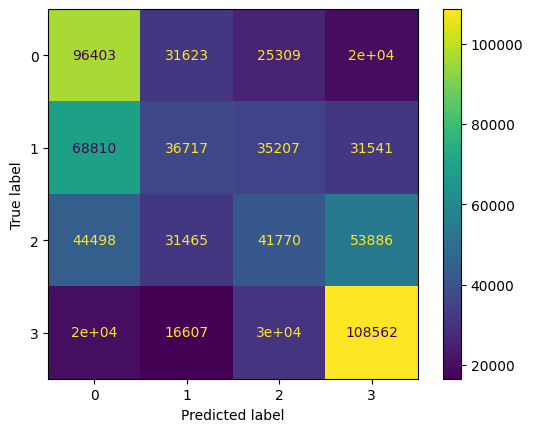

In [221]:
# Matriz de confusion

real = df_scaled['RENDIMIENTO_GLOBAL']
pred = final_model.predict(df_scaled[input_cols])
confusio = confusion_matrix(real, pred)

ConfusionMatrixDisplay(confusio).plot()

La matriz de confusión permite entender la dispersión de los datos, se observa que los bajos y los altos son los más precisos pero los valores del medio presentan una acertividad demasiada baja

In [222]:
# print(confusio[0,0] + confusio[0,1] + confusio[1,0] + confusio[1,1])
# print(confusio[0,2] + confusio[0,3] + confusio[1,2] + confusio[1,3])
# print(confusio[2,0] + confusio[2,1] + confusio[3,0] + confusio[3,1])
# print(confusio[2,2] + confusio[2,3] + confusio[3,2] + confusio[3,3])


# Carga del test.csv y limpieza
Teniendo el modelo, se estandariza, limpia y preprocesa el dataset para el test de la misma forma que se hizo con el de entrenamiento

In [223]:
df_test = pd.read_csv('test.csv')

# Definir las columnas categóricas y numéricas
categorical_features = ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       ]

# Imputar valores faltantes en columnas categóricas con la moda
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_test[categorical_features] = categorical_imputer.fit_transform(df_test[categorical_features])

df_test = column_cleaning(df_test, 'ESTU_PRGM_ACADEMICO')

# Aplicar la corrección ortográfica a toda la columna
df_test['ESTU_PRGM_ACADEMICO'] = df_test['ESTU_PRGM_ACADEMICO'].apply(correct_spelling)

missing_values = df_test.isnull().sum()
print(missing_values)

Unnamed: 0                        0
ID                                0
PERIODO                           0
ESTU_PRGM_ACADEMICO               0
ESTU_PRGM_DEPARTAMENTO            0
ESTU_VALORMATRICULAUNIVERSIDAD    0
ESTU_HORASSEMANATRABAJA           0
FAMI_ESTRATOVIVIENDA              0
FAMI_TIENEINTERNET                0
FAMI_EDUCACIONPADRE               0
FAMI_EDUCACIONMADRE               0
ESTU_PAGOMATRICULAPROPIO          0
dtype: int64


In [224]:
df_test['ESTU_PRGM_ACADEMICO']

,ESTU_PRGM_ACADEMICO
0,trabajo social
1,administracion comercial mercadeo
2,ingenieria mecatronica
3,contaduria publica
4,administracion empresas
...,...
296781,administracion empresas
296782,derecho
296783,derecho
296784,ingenieria aeronautica


In [225]:
df_test['ESTU_PRGM_ACADEMICO'] = df_test['ESTU_PRGM_ACADEMICO'].apply(categorize_career)
df_test['ESTU_PRGM_ACADEMICO']

,ESTU_PRGM_ACADEMICO
0,Otro
1,Administración y Negocios
2,Ingeniería
3,Otro
4,Administración y Negocios
...,...
296781,Administración y Negocios
296782,Derecho y Arquitectura
296783,Derecho y Arquitectura
296784,Ingeniería


In [226]:
# Aplicar los mapeos al DataFrame original
df_test.replace(mapeo, inplace=True)

# Se reemplazan los Sí/S y No/N por 1 y 2, respectivamente
df_test.replace({'Si': 1, 'No': 2}, inplace=True)
df_test.replace({'S': 1, 'N': 2}, inplace=True)

df_test

<ipython-input-226-5d4a2f97f769>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test.replace(mapeo, inplace=True)
<ipython-input-226-5d4a2f97f769>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test.replace({'Si': 1, 'No': 2}, inplace=True)


,Unnamed: 0,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO
0,0,550236,20183,Otro,BOLIVAR,1,1,3,1,8,4,1
1,1,98545,20203,Administración y Negocios,ANTIOQUIA,4,3,2,1,6,8,2
2,2,499179,20212,Ingeniería,BOGOTÁ,3,0,3,1,5,6,2
3,3,782980,20195,Otro,SUCRE,3,3,1,2,3,3,2
4,4,785185,20212,Administración y Negocios,ATLANTICO,4,2,2,1,6,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...
296781,296781,496981,20195,Administración y Negocios,BOGOTÁ,4,4,1,1,3,3,1
296782,296782,209415,20183,Derecho y Arquitectura,META,3,0,4,1,10,10,2
296783,296783,239074,20212,Derecho y Arquitectura,BOGOTÁ,4,4,3,1,6,10,2
296784,296784,963852,20195,Ingeniería,ANTIOQUIA,6,2,3,1,10,10,2


In [ ]:
ID_list = df_test['ID'].to_list()
drop_colsTest = ['ID', 'PERIODO']
for i in drop_colsTest:
    df_test.drop(i, axis='columns', inplace=True)

df_test.head()


KeyError: 'ID'

In [227]:
df_testEncoded = pd.get_dummies(df_test, columns=['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO'], dtype=int)

# Alinear columnas con df_encoded
df_testEncoded = df_testEncoded.reindex(columns=df_encoded.columns, fill_value=0)


In [ ]:
df_testEncoded = pd.get_dummies(df_test, columns = [
    'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO'], dtype=int)

df_testEncoded.columns == df_encoded.columns

ValueError: Lengths must match to compare

In [228]:
df_testEncoded.head()

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,ESTU_PRGM_ACADEMICO_Administración y Negocios,ESTU_PRGM_ACADEMICO_Ciencias Exactas,ESTU_PRGM_ACADEMICO_Ciencias de la Salud,ESTU_PRGM_ACADEMICO_Comunicación y Periodismo,ESTU_PRGM_ACADEMICO_Deporte y Actividad Física,ESTU_PRGM_ACADEMICO_Derecho y Arquitectura,ESTU_PRGM_ACADEMICO_Gastronomía,ESTU_PRGM_ACADEMICO_Ingeniería,ESTU_PRGM_ACADEMICO_Licenciaturas y Educación,ESTU_PRGM_ACADEMICO_Otro,ESTU_PRGM_ACADEMICO_Tecnología de la Información,ESTU_PRGM_DEPARTAMENTO_AMAZONAS,ESTU_PRGM_DEPARTAMENTO_ANTIOQUIA,ESTU_PRGM_DEPARTAMENTO_ARAUCA,ESTU_PRGM_DEPARTAMENTO_ATLANTICO,ESTU_PRGM_DEPARTAMENTO_BOGOTÁ,ESTU_PRGM_DEPARTAMENTO_BOLIVAR,ESTU_PRGM_DEPARTAMENTO_BOYACA,ESTU_PRGM_DEPARTAMENTO_CALDAS,ESTU_PRGM_DEPARTAMENTO_CAQUETA,ESTU_PRGM_DEPARTAMENTO_CASANARE,ESTU_PRGM_DEPARTAMENTO_CAUCA,ESTU_PRGM_DEPARTAMENTO_CESAR,ESTU_PRGM_DEPARTAMENTO_CHOCO,ESTU_PRGM_DEPARTAMENTO_CORDOBA,ESTU_PRGM_DEPARTAMENTO_CUNDINAMARCA,ESTU_PRGM_DEPARTAMENTO_GUAVIARE,ESTU_PRGM_DEPARTAMENTO_HUILA,ESTU_PRGM_DEPARTAMENTO_LA GUAJIRA,ESTU_PRGM_DEPARTAMENTO_MAGDALENA,ESTU_PRGM_DEPARTAMENTO_META,ESTU_PRGM_DEPARTAMENTO_NARIÑO,ESTU_PRGM_DEPARTAMENTO_NORTE SANTANDER,ESTU_PRGM_DEPARTAMENTO_PUTUMAYO,ESTU_PRGM_DEPARTAMENTO_QUINDIO,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SAN ANDRES,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_VAUPES
0,1,1,3,1,8,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,3,2,1,6,8,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,3,1,5,6,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,3,1,2,3,3,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4,2,2,1,6,6,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [229]:
testScaled = scaleStandar.transform(df_testEncoded)
df_testScaled = pd.DataFrame(testScaled,columns=df_testEncoded.columns)

df_testScaled.head()

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,ESTU_PRGM_ACADEMICO_Administración y Negocios,ESTU_PRGM_ACADEMICO_Ciencias Exactas,ESTU_PRGM_ACADEMICO_Ciencias de la Salud,ESTU_PRGM_ACADEMICO_Comunicación y Periodismo,ESTU_PRGM_ACADEMICO_Deporte y Actividad Física,ESTU_PRGM_ACADEMICO_Derecho y Arquitectura,ESTU_PRGM_ACADEMICO_Gastronomía,ESTU_PRGM_ACADEMICO_Ingeniería,ESTU_PRGM_ACADEMICO_Licenciaturas y Educación,ESTU_PRGM_ACADEMICO_Otro,ESTU_PRGM_ACADEMICO_Tecnología de la Información,ESTU_PRGM_DEPARTAMENTO_AMAZONAS,ESTU_PRGM_DEPARTAMENTO_ANTIOQUIA,ESTU_PRGM_DEPARTAMENTO_ARAUCA,ESTU_PRGM_DEPARTAMENTO_ATLANTICO,ESTU_PRGM_DEPARTAMENTO_BOGOTÁ,ESTU_PRGM_DEPARTAMENTO_BOLIVAR,ESTU_PRGM_DEPARTAMENTO_BOYACA,ESTU_PRGM_DEPARTAMENTO_CALDAS,ESTU_PRGM_DEPARTAMENTO_CAQUETA,ESTU_PRGM_DEPARTAMENTO_CASANARE,ESTU_PRGM_DEPARTAMENTO_CAUCA,ESTU_PRGM_DEPARTAMENTO_CESAR,ESTU_PRGM_DEPARTAMENTO_CHOCO,ESTU_PRGM_DEPARTAMENTO_CORDOBA,ESTU_PRGM_DEPARTAMENTO_CUNDINAMARCA,ESTU_PRGM_DEPARTAMENTO_GUAVIARE,ESTU_PRGM_DEPARTAMENTO_HUILA,ESTU_PRGM_DEPARTAMENTO_LA GUAJIRA,ESTU_PRGM_DEPARTAMENTO_MAGDALENA,ESTU_PRGM_DEPARTAMENTO_META,ESTU_PRGM_DEPARTAMENTO_NARIÑO,ESTU_PRGM_DEPARTAMENTO_NORTE SANTANDER,ESTU_PRGM_DEPARTAMENTO_PUTUMAYO,ESTU_PRGM_DEPARTAMENTO_QUINDIO,ESTU_PRGM_DEPARTAMENTO_RISARALDA,ESTU_PRGM_DEPARTAMENTO_SAN ANDRES,ESTU_PRGM_DEPARTAMENTO_SANTANDER,ESTU_PRGM_DEPARTAMENTO_SUCRE,ESTU_PRGM_DEPARTAMENTO_TOLIMA,ESTU_PRGM_DEPARTAMENTO_VALLE,ESTU_PRGM_DEPARTAMENTO_VAUPES
0,-1.400587,-0.971956,0.456215,-0.344211,0.712693,-0.912057,-1.131129,-0.523142,-0.163723,-0.268161,-0.151371,-0.042199,-0.324265,-0.030152,-0.521965,-0.348552,1.735982,-0.010749,-0.0076,-0.370553,-0.029176,-0.250927,-0.829229,5.706947,-0.143896,-0.130752,-0.062085,-0.051784,-0.129783,-0.11,-0.078944,-0.133848,-0.143739,-0.00731,-0.121015,-0.083352,-0.118013,-0.107491,-0.140759,-0.183624,-0.033902,-0.109663,-0.136567,-0.0038,-0.208416,-0.112626,-0.132348,-0.262332,-0.004496
1,0.270116,0.340960,-0.451335,-0.344211,0.004738,0.624636,0.884073,1.911525,-0.163723,-0.268161,-0.151371,-0.042199,-0.324265,-0.030152,-0.521965,-0.348552,-0.576043,-0.010749,-0.0076,2.698666,-0.029176,-0.250927,-0.829229,-0.175225,-0.143896,-0.130752,-0.062085,-0.051784,-0.129783,-0.11,-0.078944,-0.133848,-0.143739,-0.00731,-0.121015,-0.083352,-0.118013,-0.107491,-0.140759,-0.183624,-0.033902,-0.109663,-0.136567,-0.0038,-0.208416,-0.112626,-0.132348,-0.262332,-0.004496
2,-0.286785,-1.628413,0.456215,-0.344211,-0.349239,-0.143710,0.884073,-0.523142,-0.163723,-0.268161,-0.151371,-0.042199,-0.324265,-0.030152,1.915839,-0.348552,-0.576043,-0.010749,-0.0076,-0.370553,-0.029176,-0.250927,1.205939,-0.175225,-0.143896,-0.130752,-0.062085,-0.051784,-0.129783,-0.11,-0.078944,-0.133848,-0.143739,-0.00731,-0.121015,-0.083352,-0.118013,-0.107491,-0.140759,-0.183624,-0.033902,-0.109663,-0.136567,-0.0038,-0.208416,-0.112626,-0.132348,-0.262332,-0.004496
3,-0.286785,0.340960,-1.358885,2.905191,-1.057194,-1.296230,0.884073,-0.523142,-0.163723,-0.268161,-0.151371,-0.042199,-0.324265,-0.030152,-0.521965,-0.348552,1.735982,-0.010749,-0.0076,-0.370553,-0.029176,-0.250927,-0.829229,-0.175225,-0.143896,-0.130752,-0.062085,-0.051784,-0.129783,-0.11,-0.078944,-0.133848,-0.143739,-0.00731,-0.121015,-0.083352,-0.118013,-0.107491,-0.140759,-0.183624,-0.033902,-0.109663,-0.136567,-0.0038,-0.208416,8.878980,-0.132348,-0.262332,-0.004496
4,0.270116,-0.315498,-0.451335,-0.344211,0.004738,-0.143710,0.884073,1.911525,-0.163723,-0.268161,-0.151371,-0.042199,-0.324265,-0.030152,-0.521965,-0.348552,-0.576043,-0.010749,-0.0076,-0.370553,-0.029176,3.985224,-0.829229,-0.175225,-0.143896,-0.130752,-0.062085,-0.051784,-0.129783,-0.11,-0.078944,-0.133848,-0.143739,-0.00731,-0.121015,-0.083352,-0.118013,-0.107491,-0.140759,-0.183624,-0.033902,-0.109663,-0.136567,-0.0038,-0.208416,-0.112626,-0.132348,-0.262332,-0.004496


In [230]:
final_model.feature_names_in_

array(['ESTU_PRGM_DEPARTAMENTO_PUTUMAYO',
       'ESTU_PRGM_ACADEMICO_Comunicación y Periodismo',
       'ESTU_PRGM_ACADEMICO_Ciencias Exactas',
       'ESTU_PRGM_DEPARTAMENTO_LA GUAJIRA',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'FAMI_ESTRATOVIVIENDA',
       'ESTU_PRGM_ACADEMICO_Deporte y Actividad Física',
       'ESTU_PRGM_DEPARTAMENTO_ANTIOQUIA', 'ESTU_PRGM_DEPARTAMENTO_HUILA',
       'ESTU_PRGM_DEPARTAMENTO_BOGOTÁ', 'ESTU_PRGM_DEPARTAMENTO_CORDOBA',
       'ESTU_PRGM_DEPARTAMENTO_AMAZONAS',
       'ESTU_PRGM_DEPARTAMENTO_QUINDIO', 'ESTU_PRGM_DEPARTAMENTO_SUCRE',
       'ESTU_PRGM_ACADEMICO_Licenciaturas y Educación',
       'ESTU_PRGM_DEPARTAMENTO_BOLIVAR', 'ESTU_PRGM_DEPARTAMENTO_CAQUETA',
       'ESTU_PRGM_DEPARTAMENTO_CALDAS',
       'ESTU_PRGM_DEPARTAMENTO_CUNDINAMARCA',
       'ESTU_PRGM_DEPARTAMENTO_RISARALDA', 'FAMI_TIENEINTERNET',
       'ESTU_PRGM_DEPARTAMENTO_VALLE',
       'ESTU_PRGM_ACADEMICO_Administración y Negocios',
       'ESTU_PRGM_DEPARTAMENTO_VAUPES', 'ESTU_PR

In [231]:
predictions = final_model.predict(df_testScaled[final_model.feature_names_in_])
predictions

array([0, 2, 3, ..., 2, 3, 3])

In [232]:
submission = pd.DataFrame(
    {'ID': ID_list,
     'RENDIMIENTO_GLOBAL': predictions
    })

submission

,ID,RENDIMIENTO_GLOBAL
0,550236,0
1,98545,2
2,499179,3
3,782980,0
4,785185,0
...,...,...
296781,496981,0
296782,209415,3
296783,239074,2
296784,963852,3


In [233]:
mapeoTest = {
    'RENDIMIENTO_GLOBAL': {2:'medio-alto',  0:'bajo',  3:'alto', 1 :'medio-bajo'}
    }

submission.replace(mapeoTest, inplace=True)
submission.to_csv('submission.csv', index=False)

In [ ]:
pip install kaggle

In [ ]:
!kaggle competitions submit -c udea-ai4eng-20242 -f my_submission.csv -m


usage: kaggle competitions submit [-h] -f FILE_NAME -m MESSAGE [-q] [competition]
kaggle competitions submit: error: argument -m/--message: expected one argument
